In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/adult.csv')
data.head()

,age,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
data.set_axis(['Age', 'Workclass', 'Fnlwgt', 'Education', 'education_num', 'marital_status', 'occupation', 'relationship',
            'race', 'sex', 'capital_gain',
            'capital_loss', 'hours_per_week','native_country','income'], axis=1, inplace=True)

In [ ]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [ ]:
data.shape

(32560, 15)

In [ ]:
my_df = data.dropna()

In [ ]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


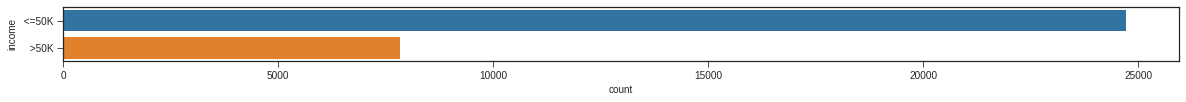

In [ ]:
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y="income", data=my_df)

In [ ]:
my_df[['Education', 'education_num']].groupby(['Education'], as_index=False).mean().sort_values(by='education_num', ascending=False)

,Education,education_num
10,Doctorate,16.0
14,Prof-school,15.0
12,Masters,14.0
9,Bachelors,13.0
7,Assoc-acdm,12.0
8,Assoc-voc,11.0
15,Some-college,10.0
11,HS-grad,9.0
2,12th,8.0
1,11th,7.0


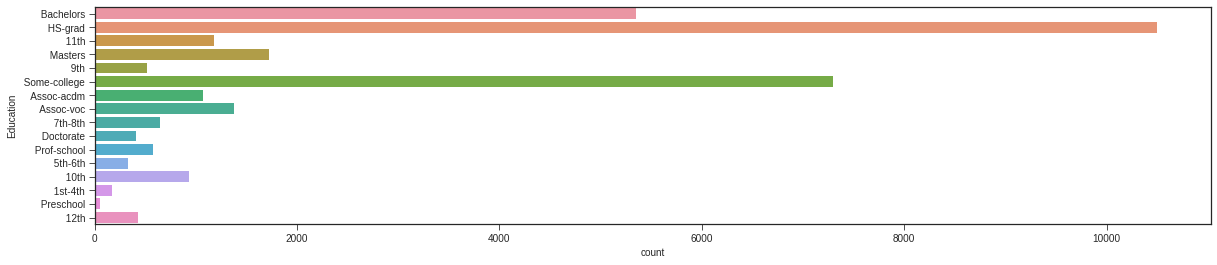

In [ ]:
fig = plt.figure(figsize=(20,4))
plt.style.use('seaborn-ticks')
sns.countplot(y='Education',data=my_df)

In [ ]:
my_df['age_bin'] = pd.cut(my_df['Age'], 20)

In [ ]:
my_df[['income', 'Age']].groupby(['income'], as_index=False).mean().sort_values(by='Age', ascending=False)


,income,Age
1,>50K,44.249841
0,<=50K,36.783648


<Figure size 3600x3600 with 0 Axes>

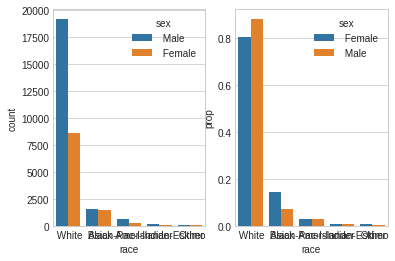

In [ ]:
plt.style.use('seaborn-whitegrid')
x, y, hue = "race", "prop", "sex"
#hue_order = ["Male", "Female"]
plt.figure(figsize=(50,50))
f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=my_df, ax=axes[0])

prop_df = (my_df[x]
           .groupby(my_df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])

In [ ]:
my_df['hours_per_week_bin'] = pd.cut(my_df['hours_per_week'], 10)
my_df['hours_per_week'] = my_df['hours_per_week']

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcou

(20.0, 60.0)

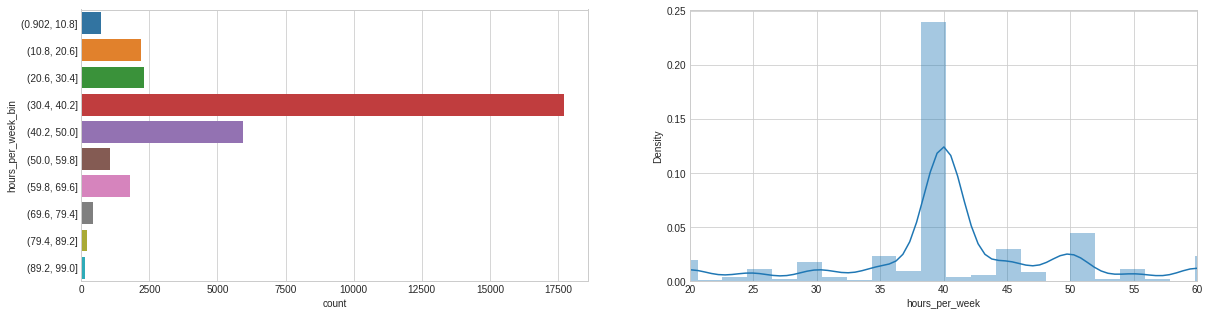

In [ ]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.countplot(y="hours_per_week_bin", data=my_df);
plt.subplot(1, 2, 2)
sns.distplot(my_df['hours_per_week']);
sns.distplot(my_df[my_df['income'] == '>50K']['hours_per_week'], kde_kws={"label": ">$50K"})
sns.distplot(my_df[my_df['income'] == '<=50K']['hours_per_week'], kde_kws={"label": "<=$50K"})
plt.ylim(0, None)
plt.xlim(20, 60)

In [ ]:
my_df.head()

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_bin,hours_per_week_bin
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,"(49.85, 53.5]","(10.8, 20.6]"
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,"(35.25, 38.9]","(30.4, 40.2]"
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,"(49.85, 53.5]","(30.4, 40.2]"
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,"(27.95, 31.6]","(30.4, 40.2]"
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,"(35.25, 38.9]","(30.4, 40.2]"


In [ ]:
# Crossing Numerical Features
my_df['age_hours'] = my_df['Age']*my_df['hours_per_week']
my_df['age_hours_bin'] = pd.cut(my_df['age_hours'], 10)

In [ ]:
from sklearn.preprocessing import LabelEncoder
my_df = my_df.apply(LabelEncoder().fit_transform)
my_df.head()

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_bin,hours_per_week_bin,age_hours,age_hours_bin
0,33,6,2925,9,12,2,4,0,4,1,0,0,12,39,0,9,1,290,0
1,21,4,14085,11,8,0,6,1,4,1,0,0,39,39,0,5,3,620,1
2,36,4,15335,1,6,2,6,0,2,1,0,0,39,39,0,9,3,810,2
3,11,4,19354,9,12,2,10,5,2,0,0,0,39,5,0,3,3,477,1
4,20,4,17699,12,13,2,4,5,4,0,0,0,39,39,0,5,3,606,1


In [ ]:
drop_elements = ['Education', 'native_country', 'income', 'age_bin', 'age_hours_bin','hours_per_week_bin']

In [ ]:
y = my_df["income"]
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: income, Length: 32560, dtype: int64

In [ ]:
X = my_df.drop(drop_elements, axis=1)
X.head()

,Age,Workclass,Fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,age_hours
0,33,6,2925,12,2,4,0,4,1,0,0,12,290
1,21,4,14085,8,0,6,1,4,1,0,0,39,620
2,36,4,15335,6,2,6,0,2,1,0,0,39,810
3,11,4,19354,12,2,10,5,2,0,0,0,39,477
4,20,4,17699,13,2,4,5,4,0,0,0,39,606


In [ ]:
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA
#from pandas.tools.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import GridSearchCV


#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
# Apply Scaling
std_scale = preprocessing.StandardScaler().fit(my_df.drop('income', axis=1))
X = std_scale.transform(my_df.drop('income', axis=1))
y = my_df['income']


In [ ]:
sc = StandardScaler()


In [ ]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=classifier.predict(X_test)
print('confusion matrix \n')
cm=confusion_matrix(y_test,y_pred)
print(cm,'\n')
print('accuracy score for decisiontreeclassifier')
accuracy_score(y_test,y_pred)


confusion matrix 

[[4363  617]
 [ 601  931]] 

accuracy score for decisiontreeclassifier


0.812960687960688

In [ ]:
print("Misclassification Rate \n")
print(1-0.812960687960688)

Misclassification Rate 

0.187039312039312


In [ ]:
decisiontree_train_predictions = classifier.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("Decisiontree Classification Report")
print(classification_report(y_train, decisiontree_train_predictions))

Decisiontree Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19739
           1       1.00      1.00      1.00      6309

    accuracy                           1.00     26048
   macro avg       1.00      1.00      1.00     26048
weighted avg       1.00      1.00      1.00     26048



In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=randomforest.predict(X_test)
print('confusion matrix \n')
cm=confusion_matrix(y_test,y_pred)
print(cm,'\n')
print('accuracy score for randomforestclassifier')
accuracy_score(y_test,y_pred)


confusion matrix 

[[4652  328]
 [ 603  929]] 

accuracy score for randomforestclassifier


0.8570331695331695

In [ ]:
randomforest_train_predictions = randomforest.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("randomforest Classification Report")
print(classification_report(y_train, randomforest_train_predictions))

randomforest Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19739
           1       1.00      1.00      1.00      6309

    accuracy                           1.00     26048
   macro avg       1.00      1.00      1.00     26048
weighted avg       1.00      1.00      1.00     26048



In [ ]:
#LogistiRegression
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression()
logi.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=logi.predict(X_test)
print('confusion matrix \n')
cm=confusion_matrix(y_test,y_pred)
print(cm,'\n')
print('accuracy score for logisticregression')
accuracy_score(y_test,y_pred)


confusion matrix 

[[4773  207]
 [1068  464]] 

accuracy score for logisticregression


0.8042076167076168

In [ ]:
logisticregression_train_predictions = logi.predict(X_train)

In [ ]:
print("logisticregression Model Classification Report")
print(classification_report(y_train, logisticregression_train_predictions))

logisticregression Model Classification Report
              precision    recall  f1-score   support

           0       0.81      0.96      0.88     19739
           1       0.69      0.31      0.43      6309

    accuracy                           0.80     26048
   macro avg       0.75      0.63      0.65     26048
weighted avg       0.78      0.80      0.77     26048



In [ ]:
#KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=knn.predict(X_test)
print('confusion matrix \n')
cm=confusion_matrix(y_test,y_pred)
print(cm,'\n')
print('accuracy score for logisticregression')
accuracy_score(y_test,y_pred)


confusion matrix 

[[4524  456]
 [1084  448]] 

accuracy score for logisticregression


0.7635135135135135

In [ ]:
knn_train_predictions = knn.predict(X_train)

In [ ]:
print("knn Model Classification Report")
print(classification_report(y_train, knn_train_predictions))

knn Model Classification Report
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     19739
           1       0.75      0.45      0.56      6309

    accuracy                           0.83     26048
   macro avg       0.79      0.70      0.73     26048
weighted avg       0.82      0.83      0.81     26048



In [ ]:
# Support Vector Classifier (SVM/SVC)
from sklearn.svm import SVC
sv = SVC(kernel='linear',random_state=0)
SVC.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_svc = svc.score(X_test,y_test)
print('The accuracy of SVC is', score_svc)

The accuracy of SVC is 0.7647420147420148


In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
x, y = make_classification(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    random_state=0)
classifier = SVC(random_state=0)
classifier.fit(x_train, y_train)
SVC(random_state=0)
predictions = classifier.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=classifier.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=classifier.classes_)
